In [1]:
# pip install -q tf-nightly

## ライブラリインポート

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

## Datasets

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

In [4]:
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.


In [5]:
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


トレーニングセットの最初の9つの画像とラベルを表示します。

(32, 160, 160, 3)


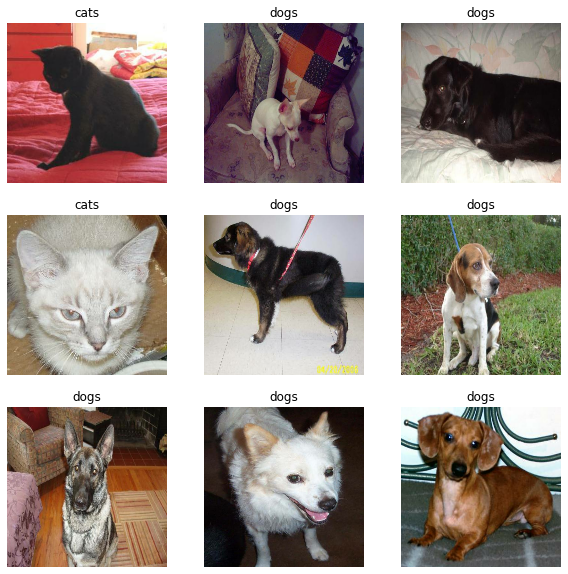

In [6]:
class_names = train_dataset.class_names
plt.figure(figsize=(10, 10))
for n, (images, labels) in enumerate(train_dataset.take(1)):
    print(images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

元のデータセットにはテストセットが含まれていないため、テストセットを作成します。そのためには、 tf.data.experimental.cardinality使用して、検証セットで使用可能なデータのバッチ数を決定し、それらの20％をテストセットに移動します。

In [7]:
val_batches = tf.data.experimental.cardinality(validation_dataset)   # validationのbatch自体の数を取得
tf.print(val_batches)

32


In [8]:
test_dataset = validation_dataset.take(val_batches // 5)
for image, label in test_dataset:
    print(image.shape)
    print(label)

(32, 160, 160, 3)
tf.Tensor([1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1], shape=(32,), dtype=int32)
(32, 160, 160, 3)
tf.Tensor([0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0], shape=(32,), dtype=int32)
(32, 160, 160, 3)
tf.Tensor([1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1], shape=(32,), dtype=int32)
(32, 160, 160, 3)
tf.Tensor([0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0], shape=(32,), dtype=int32)
(32, 160, 160, 3)
tf.Tensor([0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0], shape=(32,), dtype=int32)
(32, 160, 160, 3)
tf.Tensor([0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1], shape=(32,), dtype=int32)


In [9]:
validation_dataset = validation_dataset.skip(val_batches // 5)
for image, label in validation_dataset:
    print(image.shape)
    print(label)

(32, 160, 160, 3)
tf.Tensor([0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0], shape=(32,), dtype=int32)
(32, 160, 160, 3)
tf.Tensor([1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0], shape=(32,), dtype=int32)
(32, 160, 160, 3)
tf.Tensor([0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0], shape=(32,), dtype=int32)
(32, 160, 160, 3)
tf.Tensor([1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1], shape=(32,), dtype=int32)
(32, 160, 160, 3)
tf.Tensor([0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0], shape=(32,), dtype=int32)
(32, 160, 160, 3)
tf.Tensor([0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0], shape=(32,), dtype=int32)
(32, 160, 160, 3)
tf.Tensor([0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0], shape=(32,), dtype=int32)
(32, 160, 160, 3)
tf.Tensor([1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1], shape=(32,), dtype=int32)
(32, 160, 160, 3)
tf.Tensor([0 1

In [10]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


パフォーマンスのためにデータセットを構成する
バッファ付きプリフェッチを使用して、I / Oがブロックされることなくディスクからイメージをロードします。この方法の詳細については、 <a href="https://www.tensorflow.org/guide/data_performance">データパフォーマンスガイド</a>を参照してください。

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [12]:
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [13]:
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [14]:
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

データ拡張を使用する
大規模な画像データセットがない場合は、回転や水平反転などのランダムで現実的な変換をトレーニング画像に適用して、サンプルの多様性を人為的に導入することをお勧めします。これは、モデルをトレーニングデータのさまざまな側面に公開し、 過剰適合を減らすのに役立ちます。このチュートリアルでは、データ拡張について詳しく学習できます。

In [15]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

※ 注： これらのレイヤーは、 model.fitを呼び出すときのトレーニング中にのみアクティブになります。モデルがmodel.evaulateまたはmodel.fit推論モードで使用されている場合、これらは非アクティブmodel.fit 。

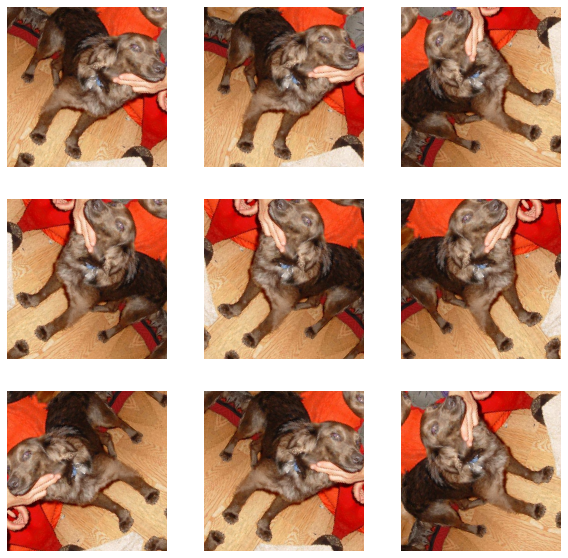

In [44]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0)) # axis=0の次元を追加している。data_augmentationの仕様上4次元にする。
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

ピクセル値の再スケーリング
tf.keras.applications.MobileNetV2に、ベースモデルとして使用するtf.keras.applications.MobileNetV2をダウンロードします。このモデルは[-1,1]のピクセル値を想定していますが、この時点では、画像のピクセル値は[0-255]です。それらを再スケーリングするには、モデルに含まれている前処理メソッドを使用します。

In [17]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [18]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset=-1)    # preprocessing.Rescaling = Multiply inputs by scale and adds offset.

## Model

### 事前トレーニング済みのconvnetsからベースモデルを作成する
Googleで開発されたMobileNet V2モデルから基本モデルを作成します。これは、1.4Mの画像と1000のクラスで構成される大規模なデータセットであるImageNetデータセットで事前トレーニングされています。 ImageNetのようなカテゴリの多種多様な研究のトレーニングデータセットであるjackfruitとsyringe 。この知識ベースは、特定のデータセットから猫と犬を分類するのに役立ちます。

最初に、特徴抽出に使用するMobileNet V2のレイヤーを選択する必要があります。最後の分類レイヤー（機械学習モデルのほとんどの図は下から上に行くため、「上」にあります）はあまり役に立ちません。代わりに、フラット化操作の前の最後のレイヤーに依存するという一般的な方法に従います。この層を「ボトルネック層」と呼びます。ボトルネックレイヤー機能は、ファイナル/トップレイヤーと比較して、より一般性を保持しています。

最初に、ImageNetでトレーニングされた重みがプリロードされたMobileNet V2モデルをインスタンス化します。 include_top = False引数を指定することにより、上部に分類レイヤーを含まないネットワークをロードします。これは、特徴抽出に最適です。

In [19]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,  # include_topがFalseの場合のみ指定可能 (そうでないときは入力のshapeは(224, 224, 3)
                                               include_top=False,  # ネットワークの出力層側にある全結合層を含むかどうか．
                                               weights='imagenet')   # (ランダム初期化) か 'imagenet' (ImageNetで学習した重み) の一方

この特徴抽出は各変換160x160x3に画像を5x5x1280の機能ブロック。それが画像のバッチの例に対して何をするか見てみましょう：

In [20]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


## 特徴抽出

このステップでは、前のステップで作成したたたみ込みベースをフリーズし、特徴抽出として使用します。さらに、その上に分類子を追加し、最上位の分類子をトレーニングします。

### 畳み込みベースをフリーズ
モデルをコンパイルしてトレーニングする前に、畳み込みベースをフリーズすることが重要です。 （layer.trainable = Falseを設定して）フリーズすると、トレーニング中に特定のレイヤーのウェイトが更新されなくなります。 MobileNet V2には多くのレイヤーがあるため、モデル全体のtrainableフラグをFalseに設定すると、すべてのレイヤーがフリーズします。

In [21]:
base_model.trainable = False

### BatchNormalizationレイヤーに関する重要な注意
多くのモデルにはtf.keras.layers.BatchNormalizationレイヤーが含まれてtf.keras.layers.BatchNormalizationます。このレイヤーは特殊なケースであり、このチュートリアルの後半に示すように、微調整のコンテキストでは注意が必要です。

layer.trainable = Falseを設定すると、 BatchNormalizationレイヤーは推論モードで実行され、その平均と分散の統計は更新されません。

微調整を行うためにBatchNormalizationレイヤーを含むモデルをフリーズ解除する場合は、ベースモデルを呼び出すときにtraining = Falseを渡して、BatchNormalizationレイヤーを推論モードに保つ必要があります。そうでない場合、トレーニング不可能な重みに適用される更新は、モデルが学習したモデルを破壊します。

詳細については、 転移学習ガイドをご覧ください。

In [22]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### 分類ヘッドを追加する
機能のブロックから予測を生成するには、 <a href="https://keras.io/ja/layers/pooling/">tf.keras.layers.GlobalAveragePooling2D</a>レイヤーを使用して、画像を1つの1280要素のベクトルに変換することにより、空間的な5x5空間位置を平均します。

In [23]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


tf.keras.layers.Denseレイヤーを適用して、これらの機能を画像ごとに1つの予測に変換します。この予測はlogitまたは生の予測値として扱われるため、ここではアクティブ化関数は必要ありません。正の数はクラス1を予測し、負の数はクラス0を予測します。

In [24]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


Keras Functional APIを使用して、データ拡張、再スケーリング、base_model、および特徴抽出レイヤーをつなぎ合わせてモデルを構築します 。前述のように、モデルにはBatchNormalizationレイヤーが含まれているため、training = Falseを使用します。

In [25]:
inputs = tf.keras.Input(shape=(160, 160, 3))    # instantiate a Keras tensor.
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

## モデルをコンパイルする
モデルをトレーニングする前にコンパイルします。 2つのクラスがあるため、モデルは線形出力を提供するため、 from_logits=Trueをfrom_logits=Trueてバイナリクロスエントロピー損失を使用します。

In [26]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

MobileNetの2.5Mパラメーターはフリーズされていますが、Denseレイヤーには1.2Kのトレーニング可能なパラメーターがあります。これらは、2つのtf.Variableオブジェクトである重みとバイアスに分けられます。

In [28]:
len(model.trainable_variables)

2

モデルをトレーニングする
10エポックのトレーニング後、検証セットの精度が最大94％になるはずです。

In [29]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

26/26 [==============================] - 5s 106ms/step - loss: 1.0498 - accuracy: 0.2513


In [30]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.03
initial accuracy: 0.27


In [31]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 15s 180ms/step - loss: 0.8600 - accuracy: 0.4605 - val_loss: 0.6889 - val_accuracy: 0.5743
Epoch 2/10
63/63 [==============================] - 11s 172ms/step - loss: 0.6487 - accuracy: 0.6190 - val_loss: 0.4902 - val_accuracy: 0.7500
Epoch 3/10
63/63 [==============================] - 11s 167ms/step - loss: 0.5017 - accuracy: 0.7370 - val_loss: 0.3730 - val_accuracy: 0.8651
Epoch 4/10
63/63 [==============================] - 11s 170ms/step - loss: 0.4202 - accuracy: 0.7855 - val_loss: 0.2992 - val_accuracy: 0.8948
Epoch 5/10
63/63 [==============================] - 11s 168ms/step - loss: 0.3672 - accuracy: 0.8370 - val_loss: 0.2469 - val_accuracy: 0.9245
Epoch 6/10
63/63 [==============================] - 11s 168ms/step - loss: 0.3238 - accuracy: 0.8510 - val_loss: 0.2154 - val_accuracy: 0.9381
Epoch 7/10
63/63 [==============================] - 11s 165ms/step - loss: 0.2932 - accuracy: 0.8715 - val_loss: 0.1894 - val_accuracy: 0.9480

### 学習曲線
MobileNet V2基本モデルを固定特徴抽出器として使用する場合のトレーニングと検証の精度/損失の学習曲線を見てみましょう。

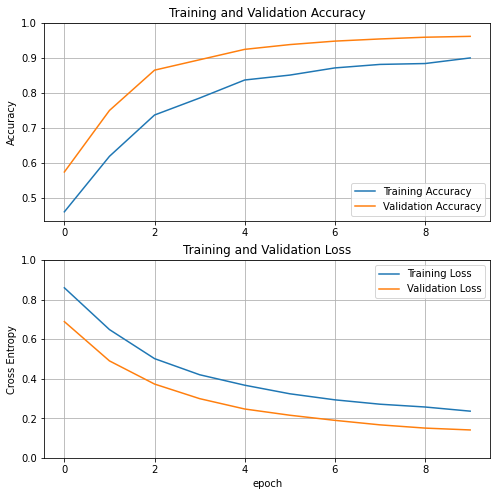

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.grid(True)
plt.show()

注： 検証メトリックスがトレーニングメトリックスよりも明らかに優れている理由を疑問に思っている場合、主な要因は、 tf.keras.layers.BatchNormalizationやtf.keras.layers.Dropoutなどのレイヤーがトレーニング中の精度に影響するためです。検証損失の計算時にはオフになっています。

それほどではありませんが、トレーニングメトリックスがエポックの平均を報告する一方で、検証メトリックスはエポック後に評価されるため、検証メトリックスは少し長くトレーニングされたモデルを参照します。

## 微調整
特徴抽出実験では、MobileNet V2基本モデルの上にある数層のみをトレーニングしました。事前トレーニング済みネットワークの重みは、トレーニング中に更新されませんでした 。

パフォーマンスをさらに向上させる1つの方法は、追加した分類器のトレーニングとともに、事前トレーニング済みモデルの最上位レイヤーの重みをトレーニング（または「微調整」）することです。トレーニングプロセスでは、一般的な機能マップからデータセットに関連付けられた機能に重みを強制的に調整します。

注： これは、事前トレーニング済みモデルをトレーニング不可に設定して最上位の分類子をトレーニングした後でのみ試行してください。ランダムに初期化された分類子を事前トレーニング済みのモデルの上に追加し、すべてのレイヤーを一緒にトレーニングしようとすると、（分類子からのランダムな重みのため）勾配の更新の大きさが大きすぎ、事前トレーニング済みのモデルはそれが学んだことを忘れてください。

また、MobileNetモデル全体ではなく、少数の最上位層を微調整する必要があります。ほとんどのたたみ込みネットワークでは、上位のレイヤーほど、それはより特殊化されます。最初の数層は、ほとんどすべてのタイプの画像に一般化する非常にシンプルで一般的な機能を学習します。上に行くほど、機能はモデルがトレーニングされたデータセットに固有のものになります。微調整の目的は、一般的な学習を上書きするのではなく、これらの特殊な機能を新しいデータセットで動作するように適合させることです。

### モデルの最上層をフリーズ解除します
必要なのは、 base_model解除し、最下層をトレーニングできないように設定することだけです。次に、モデルを再コンパイルし（これらの変更を有効にするために必要）、トレーニングを再開します。

In [33]:
base_model.trainable = True

In [34]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


### モデルをコンパイルする
はるかに大きなモデルをトレーニングしていて、事前トレーニング済みの重みを再適応させたいので、この段階では低い学習率を使用することが重要です。そうしないと、モデルがすぐにオーバーフィットする可能性があります。

In [35]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [37]:
len(model.trainable_variables)

56

### モデルのトレーニングを続ける
以前に収束するようにトレーニングした場合、この手順により、精度が数パーセントポイント向上します。

In [38]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
63/63 [==============================] - 19s 224ms/step - loss: 0.2059 - accuracy: 0.9110 - val_loss: 0.0610 - val_accuracy: 0.9790
Epoch 11/20
63/63 [==============================] - 14s 217ms/step - loss: 0.1325 - accuracy: 0.9462 - val_loss: 0.0504 - val_accuracy: 0.9864
Epoch 12/20
63/63 [==============================] - 14s 208ms/step - loss: 0.1226 - accuracy: 0.9489 - val_loss: 0.0492 - val_accuracy: 0.9765
Epoch 13/20
63/63 [==============================] - 14s 218ms/step - loss: 0.0931 - accuracy: 0.9598 - val_loss: 0.0365 - val_accuracy: 0.9876
Epoch 14/20
63/63 [==============================] - 14s 218ms/step - loss: 0.0935 - accuracy: 0.9631 - val_loss: 0.0364 - val_accuracy: 0.9864
Epoch 15/20
63/63 [==============================] - 14s 214ms/step - loss: 0.0966 - accuracy: 0.9620 - val_loss: 0.0364 - val_accuracy: 0.9889
Epoch 16/20
63/63 [==============================] - 14s 217ms/step - loss: 0.0869 - accuracy: 0.9635 - val_loss: 0.0370 - val_accuracy:

obileNet V2基本モデルの最後のいくつかのレイヤーを微調整し、その上に分類子をトレーニングするときのトレーニングと検証の精度/損失の学習曲線を見てみましょう。検証の損失はトレーニングの損失よりもはるかに大きいため、オーバーフィッティングが発生する可能性があります。

また、新しいトレーニングセットは比較的小さく、元のMobileNet V2データセットに類似しているため、オーバーフィットする可能性があります。

モデルを微調整した後、検証セットの精度はほぼ98％に達します。

In [39]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

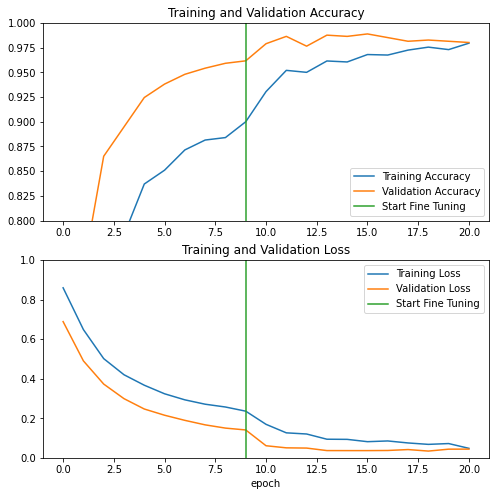

In [40]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## 評価と予測
最後に、テストセットを使用して、新しいデータに対するモデルのパフォーマンスを確認できます。

In [41]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

6/6 [==============================] - 1s 99ms/step - loss: 0.0294 - accuracy: 0.9844
Test accuracy : 0.984375


これで、このモデルを使用してペットが猫か犬かを予測する準備が整いました。

Predictions:
 [1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1]
Labels:
 [1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1]


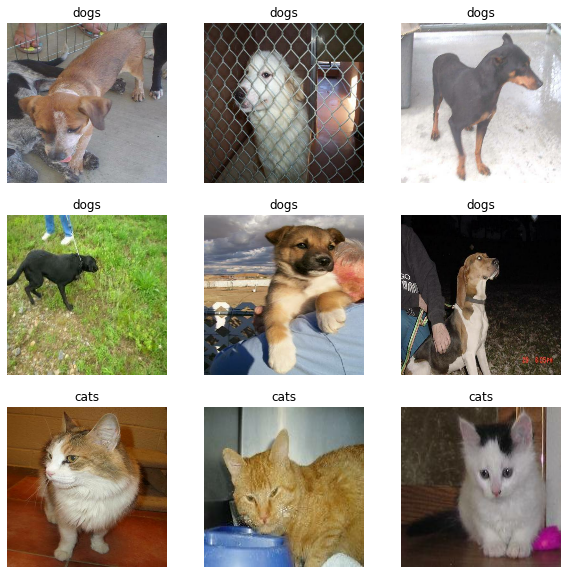

In [42]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

## 概要
- 特徴抽出のための事前トレーニング済みモデルの使用 ：小さなデータセットを操作する場合、同じドメイン内のより大きなデータセットでトレーニングされたモデルによって学習された特徴を利用することが一般的な方法です。これは、事前トレーニング済みのモデルをインスタンス化し、完全に接続された分類子を上に追加することによって行われます。事前トレーニング済みモデルは「凍結」され、トレーニング中に分類子の重みのみが更新されます。この場合、たたみ込みベースは各画像に関連付けられたすべての特徴を抽出し、抽出された特徴のセットが与えられたときに画像クラスを決定する分類器をトレーニングしました。

- 事前トレーニング済みモデルの微調整 ：パフォーマンスをさらに向上させるには、事前トレーニング済みモデルの最上位のレイヤーを、微調整によって新しいデータセットに再利用することができます。この場合、モデルがデータセットに固有の高レベルの特徴を学習するように重みを調整しました。この手法は通常、トレーニングデータセットが大きく、事前トレーニングされたモデルがトレーニングされた元のデータセットと非常に類似している場合に推奨されます。

詳細については、 <a href="https://www.tensorflow.org/guide/keras/transfer_learning">転移学習ガイド</a>をご覧ください 。